In [3]:
from google.colab import drive
drive.mount('/content/drive')

#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#subir archivo de datos y revisar carga
ruta = '/content/drive/MyDrive/DataSet/retail_sales_dataset_limpio.csv'
df = pd.read_csv(ruta)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,BEAUTY,3,50,150
1,2,2023-02-27,CUST002,Female,26,CLOTHING,2,500,1000
2,3,2023-01-13,CUST003,Male,50,ELECTRONICS,1,30,30
3,4,2023-05-21,CUST004,Male,37,CLOTHING,1,500,500
4,5,2023-05-06,CUST005,Male,30,BEAUTY,2,50,100
5,6,2023-04-25,CUST006,Female,45,BEAUTY,1,30,30
6,7,2023-03-13,CUST007,Male,46,CLOTHING,2,25,50
7,8,2023-02-22,CUST008,Male,30,ELECTRONICS,4,25,100
8,9,2023-12-13,CUST009,Male,63,ELECTRONICS,2,300,600
9,10,2023-10-07,CUST010,Female,52,CLOTHING,4,50,200


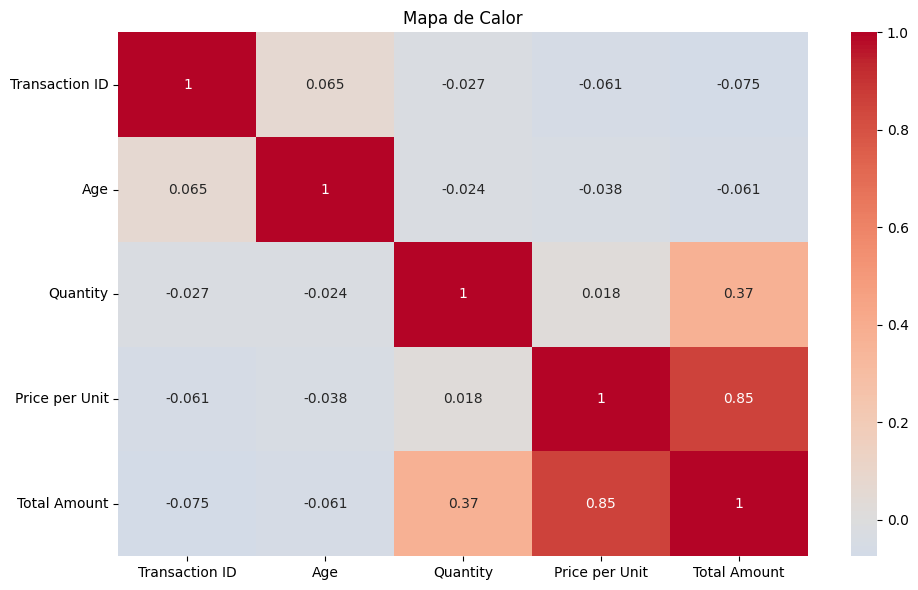

In [5]:
#realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
#seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

#mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor")
plt.tight_layout()
plt.show()

<ipython-input-11-1872220171>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Total Amount', ax=axs[1, 1], palette='pastel')


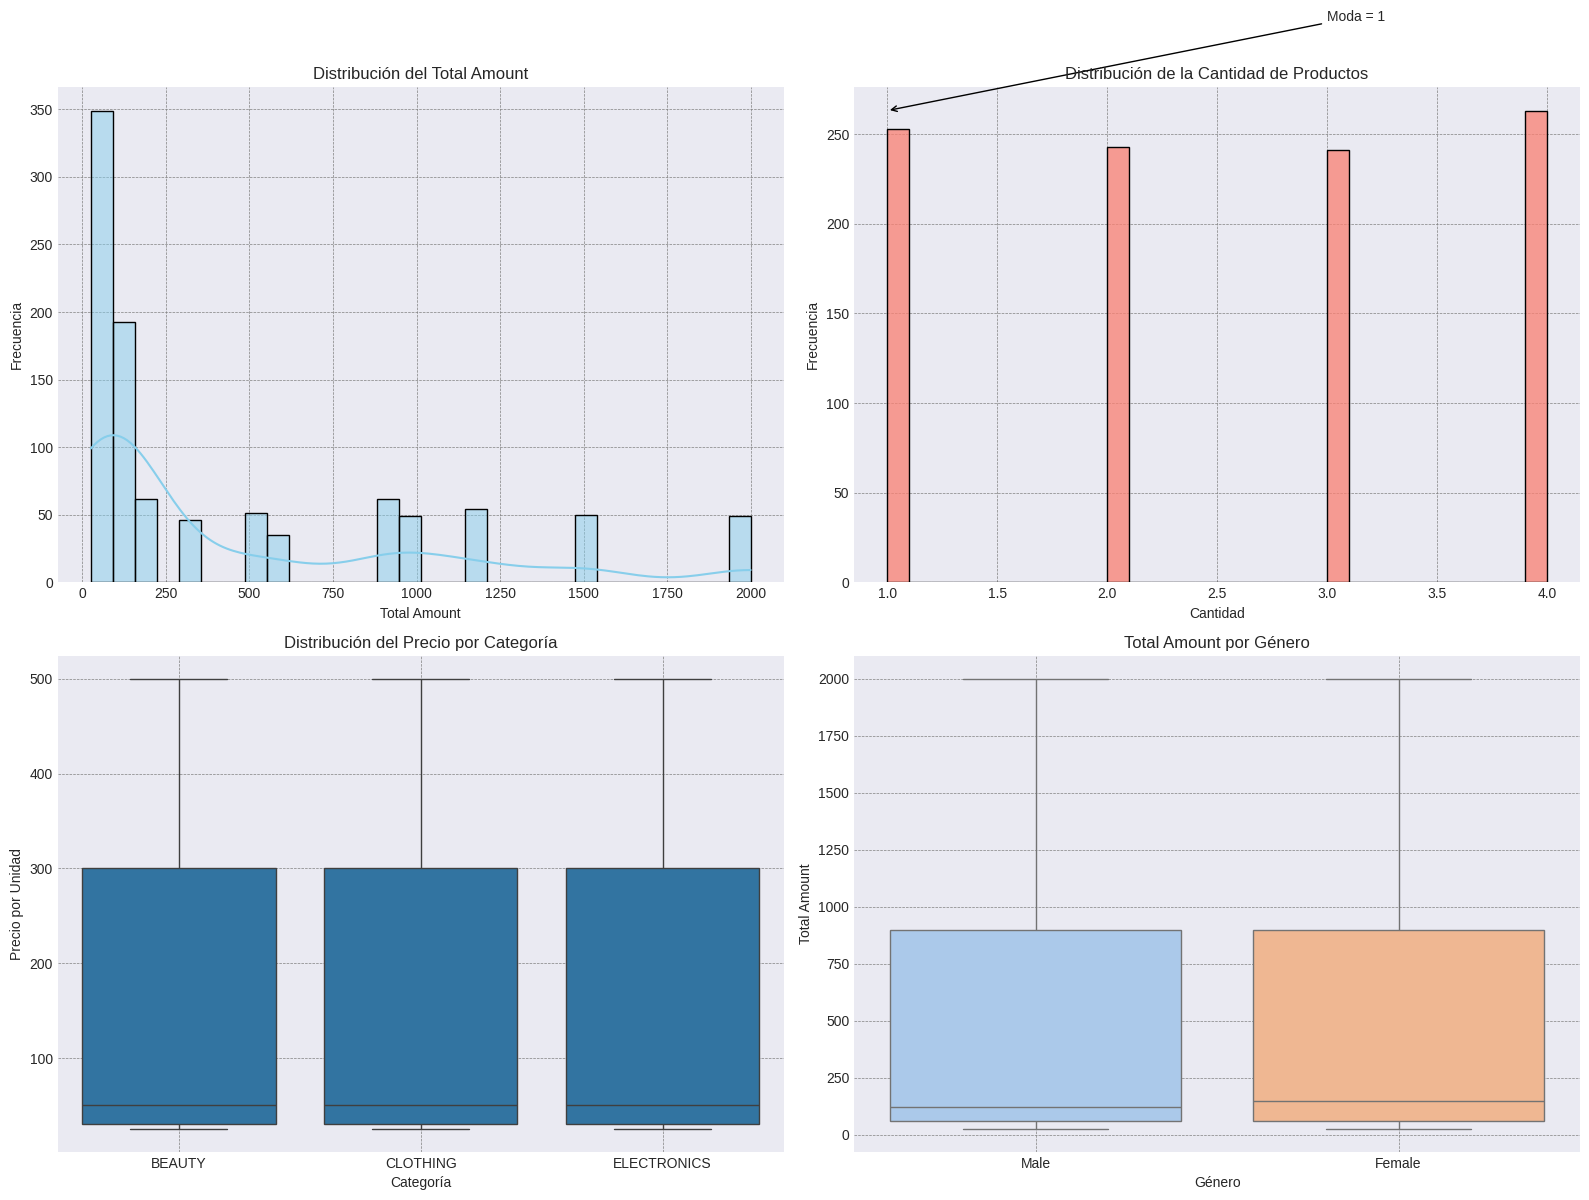

In [11]:
#crea subplots para comparar diferentes variables clave.
#añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.style.use('seaborn-v0_8-darkgrid')

#histograma del Total Amount
sns.histplot(df['Total Amount'], bins=30, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Distribución del Total Amount")
axs[0, 0].set_xlabel("Total Amount")
axs[0, 0].set_ylabel("Frecuencia")
axs[0, 0].grid(True, linestyle='--', linewidth=0.5, color='gray')
axs[0, 0].annotate('Pico principal', xy=(20, 400), xytext=(40, 450),
                   arrowprops=dict(facecolor='black', arrowstyle='->'))

#histograma de la cantidad
sns.histplot(df['Quantity'], bins=30, kde=False, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title("Distribución de la Cantidad de Productos")
axs[0, 1].set_xlabel("Cantidad")
axs[0, 1].set_ylabel("Frecuencia")
axs[0, 1].grid(True, linestyle='--', linewidth=0.5, color='gray')
axs[0, 1].annotate('Moda = 1', xy=(1, df['Quantity'].value_counts().max()),
                   xytext=(3, df['Quantity'].value_counts().max() + 50),
                   arrowprops=dict(facecolor='green', arrowstyle='->'))

#boxplot por categoría (Precio unitario)
sns.boxplot(data=df, x='Product Category', y='Price per Unit', ax=axs[1, 0])
axs[1, 0].set_title("Distribución del Precio por Categoría")
axs[1, 0].set_xlabel("Categoría")
axs[1, 0].set_ylabel("Precio por Unidad")
axs[1, 0].grid(True, linestyle='--', linewidth=0.5, color='gray')

#boxplot por género (Total Amount)
sns.boxplot(data=df, x='Gender', y='Total Amount', ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title("Total Amount por Género")
axs[1, 1].set_xlabel("Género")
axs[1, 1].set_ylabel("Total Amount")
axs[1, 1].grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()